In [53]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import matplotlib.ticker as ticker
import sys
sys.path.insert(0, '/home/jenny/remote_learning_code_Spring_2017-2020')
from utils import parse_args


sys.argv = ['-f']
args = parse_args()

term_20 = args.semester_2020_Spring
start_date_20 = args.start_date_2020_Spring
#firstweek_enddate_20 = args.first_week_end_date_2020_Spring
remote_date_20 = args.remote_date_2020_Spring
#lastweek_startdate_20 = args.last_week_start_date_2020_Spring
end_date_20 = args.end_date_2020_Spring

In [55]:
assignment_group = pd.read_csv(args.assignment_groups, sep='\t', header=0)
assignments = pd.read_csv(args.assignments, sep='\t', header=0)
assignments = assignments.merge(assignment_group, on='assignment_group_id', how='left')
assignments_before = assignments.loc[(assignments['asn_unlock_at']>=start_date_20)&(assignments['asn_unlock_at']<'2021-01-21'), ['default_assignment_name']]
assignments_before_num = len(assignments_before)
assignments_before = assignments_before.groupby('default_assignment_name').size().reset_index()
assignments_before['sum'] = assignments_before_num
assignments_before['prop'] = assignments_before[0] / assignments_before['sum']
assignments_before = assignments_before.sort_values(by=['prop'], ascending=False)
assignment_before_group_name = assignments_before.loc[assignments_before['prop']>=0.01]
group_names = assignment_before_group_name['default_assignment_name'].tolist()
group_names.append('Others')
group_prop = assignment_before_group_name['prop'].tolist()
group_prop.append(1-sum(group_prop))

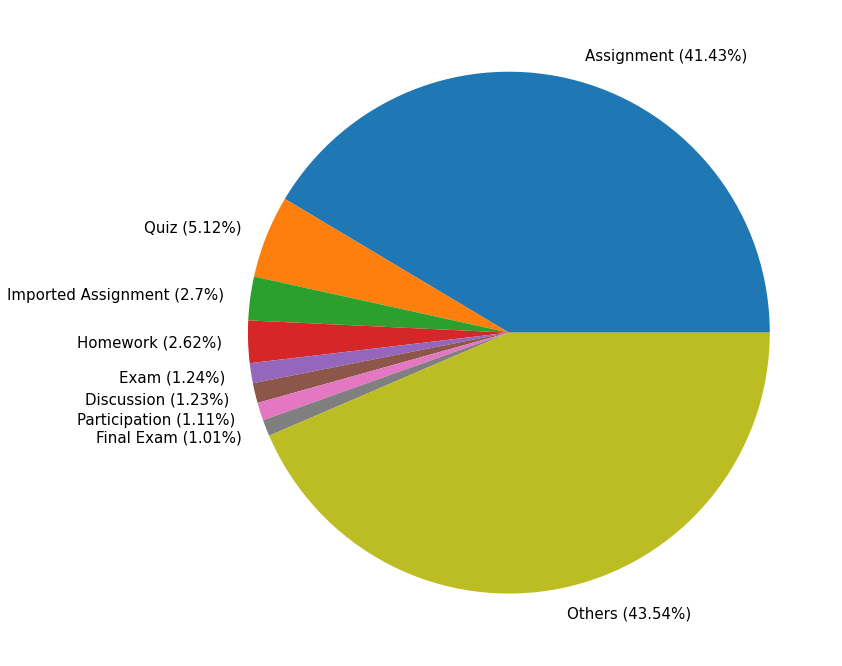

In [56]:
df = pd.DataFrame({' ': group_prop}, index=[i+' ('+str(round(j*100, 2))+'%)' for i, j in zip(group_names, group_prop)])
plot = df.plot.pie(y=' ', figsize=(12, 12), fontsize=15, legend=False)
#plt.legend(bbox_to_anchor=(0.9, 1), loc='upper left', frameon=False)

In [57]:
assignment_group = pd.read_csv(args.assignment_groups, sep='\t', header=0)
assignments = pd.read_csv(args.assignments, sep='\t', header=0)
assignments = assignments.merge(assignment_group, on='assignment_group_id', how='left')
assignments_before = assignments.loc[(assignments['asn_unlock_at']>=start_date_20)&(assignments['asn_unlock_at']<=end_date_20), ['default_assignment_name']]
assignments_before_num = len(assignments_before)
assignments_before = assignments_before.groupby('default_assignment_name').size().reset_index()
assignments_before['sum'] = assignments_before_num
assignments_before['prop'] = assignments_before[0] / assignments_before['sum']
assignments_before = assignments_before.sort_values(by=['prop'], ascending=False)
assignment_before_group_name = assignments_before.loc[assignments_before['prop']>=0.01]
group_names = assignment_before_group_name['default_assignment_name'].tolist()
group_names.append('Others')
group_prop = assignment_before_group_name['prop'].tolist()
group_prop.append(1-sum(group_prop))

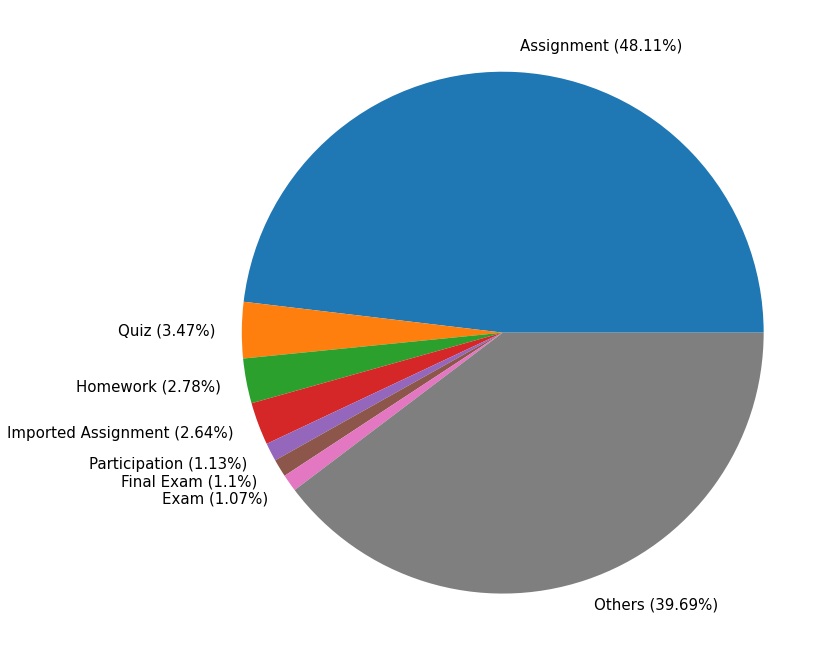

In [58]:
df = pd.DataFrame({' ': group_prop}, index=[i+' ('+str(round(j*100, 2))+'%)' for i, j in zip(group_names, group_prop)])
plot = df.plot.pie(y=' ', figsize=(12, 12), fontsize=15, legend=False)
#plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left')

In [59]:
assignment_group = pd.read_csv(args.assignment_groups, sep='\t', header=0)
assignments = pd.read_csv(args.assignments, sep='\t', header=0)
assignments = assignments.merge(assignment_group, on='assignment_group_id', how='left')
assignments_before = assignments.loc[(assignments['asn_unlock_at']>='2020-05-08')&(assignments['asn_unlock_at']<=end_date_20), ['default_assignment_name']]
assignments_before_num = len(assignments_before)
assignments_before = assignments_before.groupby('default_assignment_name').size().reset_index()
assignments_before['sum'] = assignments_before_num
assignments_before['prop'] = assignments_before[0] / assignments_before['sum']
assignments_before = assignments_before.sort_values(by=['prop'], ascending=False)
assignment_before_group_name = assignments_before.loc[assignments_before['prop']>=0.01]
group_names = assignment_before_group_name['default_assignment_name'].tolist()
group_names.append('Others')
group_prop = assignment_before_group_name['prop'].tolist()
group_prop.append(1-sum(group_prop))

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:1547: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


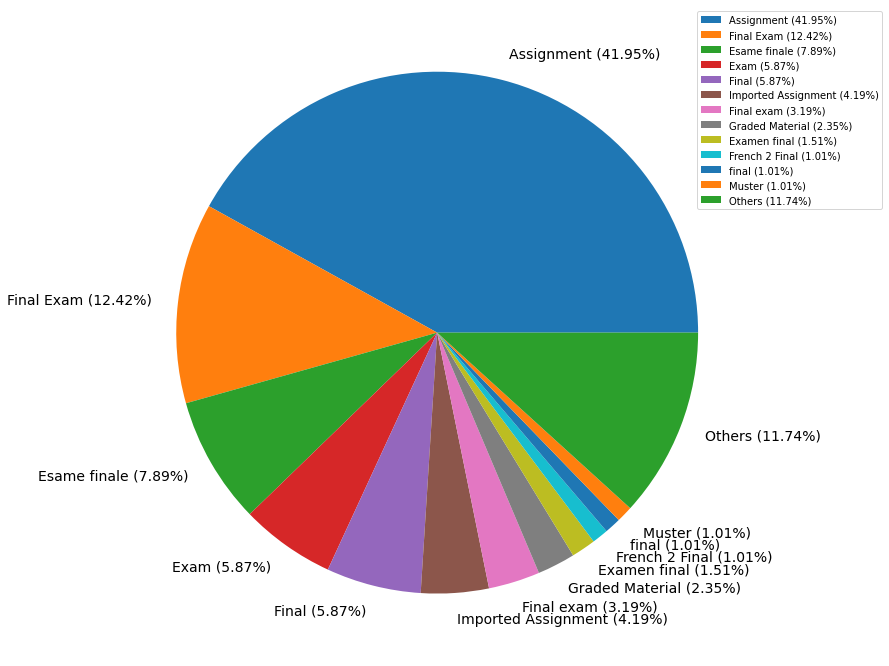

In [61]:
df = pd.DataFrame({' ': group_prop}, index=[i+' ('+str(round(j*100, 2))+'%)' for i, j in zip(group_names, group_prop)])
plot = df.plot.pie(y=' ', figsize=(12, 12), fontsize=14)
plt.legend(bbox_to_anchor=(0.89, 1), loc='upper left')